# Regression with CART Trees - Lab

## Introduction

In this lab, we'll make use of what we learned in the previous lesson to build a model for the [Petrol Consumption Dataset](https://www.kaggle.com/harinir/petrol-consumption) from Kaggle. This model will be used to predict gasoline consumption for a bunch of examples, based on features about the drivers.

## Objectives

In this lab you will: 

- Fit a decision tree regression model with scikit-learn

## Import necessary libraries 

In [1]:
# Import libraries 
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 

## The dataset 

- Import the `'petrol_consumption.csv'` dataset 
- Print the first five rows of the data 
- Print the dimensions of the data 

In [2]:
# Import the dataset
dataset = pd.read_csv('petrol_consumption.csv')

In [3]:
# Print the first five rows
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# Print the dimensions of the data
dataset.shape

(48, 5)

- Print the summary statistics of all columns in the data: 

In [5]:
# Describe the dataset
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Create training and test sets

- Assign the target column `'Petrol_Consumption'` to `y` 
- Assign the remaining independent variables to `X` 
- Split the data into training and test sets using a 80/20 split 
- Set the random state to 42 

In [6]:
# Split the data into training and test sets
X = dataset.drop(columns=['Petrol_Consumption'])
y = dataset.Petrol_Consumption
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [40]:
# Import the DecisionTreeRegressor class 
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit a regression tree model to training data 
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

## Make predictions and calculate the MAE, MSE, and RMSE

Use the above model to generate predictions on the test set. 

Just as with decision trees for classification, there are several commonly used metrics for evaluating the performance of our model. The most common metrics are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

If these look familiar, it's likely because you have already seen them before -- they are common evaluation metrics for any sort of regression model, and as we can see, regressions performed with decision tree models are no exception!

Since these are common evaluation metrics, `sklearn` has functions for each of them that we can use to make our job easier. You'll find these functions inside the `metrics` module. In the cell below, calculate each of the three evaluation metrics. 

In [32]:
from sklearn.metrics import r2_score

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 80.62857142857142
Mean Squared Error: 14718.398909297053
Root Mean Squared Error: 121.31940862573083


In [42]:
r2_score(y_test, y_pred)

-1.193864992464782

In [11]:
print(regressor)

DecisionTreeRegressor()


## Level Up (Optional)

- Look at the hyperparameters used in the regression tree, check their value ranges in official doc and try running some optimization by growing a number of trees in a loop 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results 

- Check for outliers, try normalization and see the impact on the output 

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style()

In [16]:
import seaborn as sns

In [22]:
import my_functions as mf

Variable: Petrol_tax
Normality Test Results for ['Petrol_tax']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Petrol_tax 
 Statistic 
 9.999997e-01 
 0.909841 
 
 
 p-value 
 1.794890e-314 
 0.001327 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Petrol_tax 
 2.025727 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Petrol_tax 
 
 
 
 
 Statistic 
 0.117307 
 
 
 p-value 
 0.943034 
 
 
 Skew 
 0.075974 
 
 
 Kurtosis 
 3.188588

count    48.000000
mean      7.668333
std       0.950770
min       5.000000
25%       7.000000
50%       7.500000
75%       8.125000
max      10.000000
Name: Petrol_tax, dtype: float64

Skew: 0.07597360698644973
Kurtosis: 0.18858818834784463


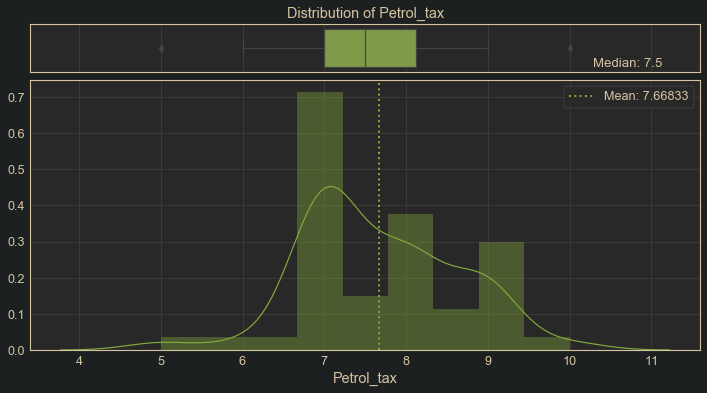

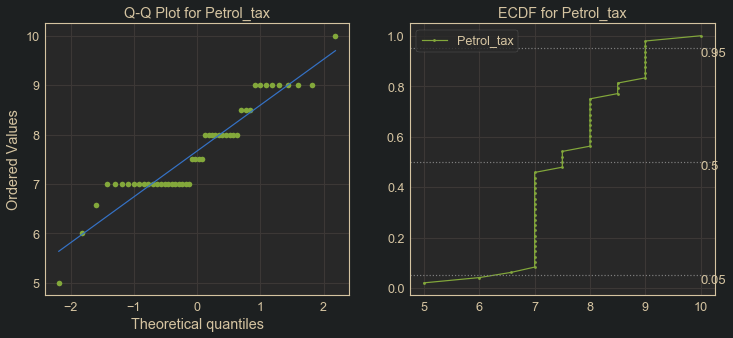

Variable: Average_income
Normality Test Results for ['Average_income']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Average_income 
 Statistic 
 1.0 
 0.975230 
 
 
 p-value 
 0.0 
 0.398761 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Average_income 
 0.375093 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Average_income 
 
 
 
 
 Statistic 
 1.302988 
 
 
 p-value 
 0.521266 
 
 
 Skew 
 0.100820 
 
 
 Kurtosis 
 2.218441

count      48.000000
mean     4241.833333
std       573.623768
min      3063.000000
25%      3739.000000
50%      4298.000000
75%      4578.750000
max      5342.000000
Name: Average_income, dtype: float64

Skew: 0.1008201421211541
Kurtosis: -0.7815594711585185


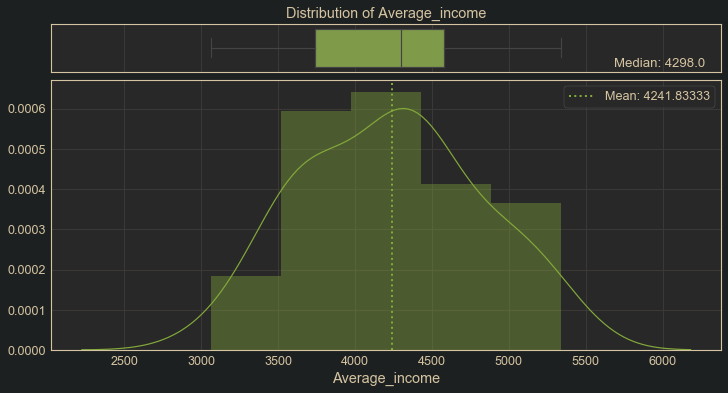

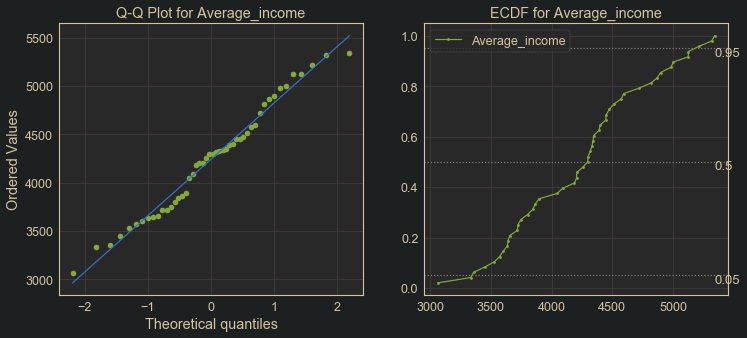

Variable: Paved_Highways
Normality Test Results for ['Paved_Highways']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Paved_Highways 
 Statistic 
 1.0 
 0.924972 
 
 
 p-value 
 0.0 
 0.004471 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Paved_Highways 
 0.744456 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Paved_Highways 
 
 
 
 
 Statistic 
 18.382275 
 
 
 p-value 
 0.000102 
 
 
 Skew 
 1.164773 
 
 
 Kurtosis 
 4.940195

count       48.000000
mean      5565.416667
std       3491.507166
min        431.000000
25%       3110.250000
50%       4735.500000
75%       7156.000000
max      17782.000000
Name: Paved_Highways, dtype: float64

Skew: 1.164772608126722
Kurtosis: 1.9401949404135141


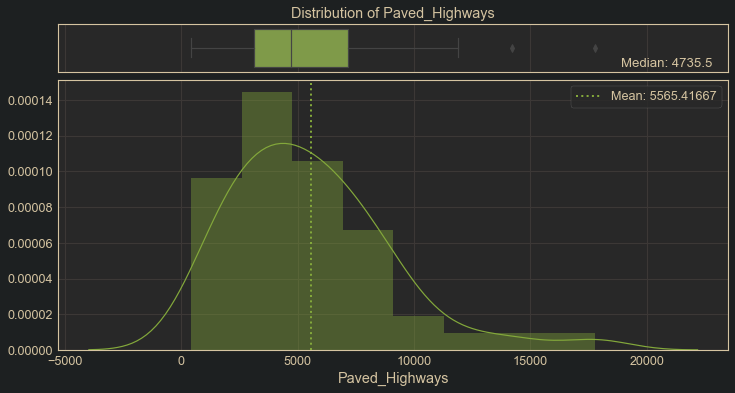

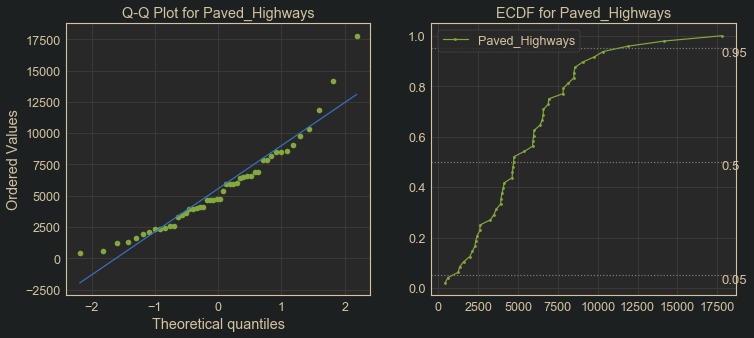

Variable: Population_Driver_licence(%)
Normality Test Results for ['Population_Driver_licence(%)']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Population_Driver_licence(%) 
 Statistic 
 6.740052e-01 
 0.960987 
 
 
 p-value 
 4.412213e-22 
 0.110676 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Population_Driver_licence(%) 
 0.746016 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Population_Driver_licence(%) 
 
 
 
 
 Statistic 
 3.373872 
 
 
 p-value 
 0.185086 
 
 
 Skew 
 0.630524 
 
 
 Kurtosis 
 3.310960

count    48.000000
mean      0.570333
std       0.055470
min       0.451000
25%       0.529750
50%       0.564500
75%       0.595250
max       0.724000
Name: Population_Driver_licence(%), dtype: float64

Skew: 0.6305235417311285
Kurtosis: 0.3109600243930464


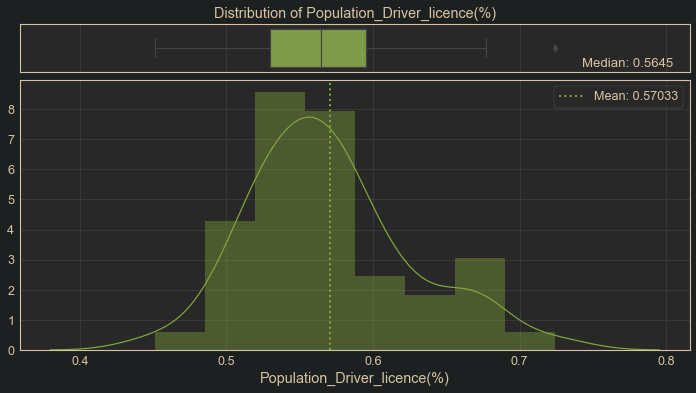

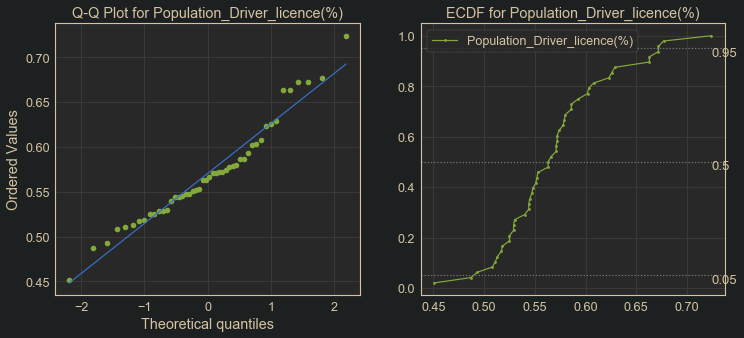

Variable: Petrol_Consumption
Normality Test Results for ['Petrol_Consumption']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Petrol_Consumption 
 Statistic 
 1.0 
 0.933531 
 
 
 p-value 
 0.0 
 0.009222 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Petrol_Consumption 
 0.802944 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Petrol_Consumption 
 
 
 
 
 Statistic 
 19.982847 
 
 
 p-value 
 0.000046 
 
 
 Skew 
 1.051156 
 
 
 Kurtosis 
 5.360447

count     48.000000
mean     576.770833
std      111.885816
min      344.000000
25%      509.500000
50%      568.500000
75%      632.750000
max      968.000000
Name: Petrol_Consumption, dtype: float64

Skew: 1.0511556057696005
Kurtosis: 2.3604472156156664


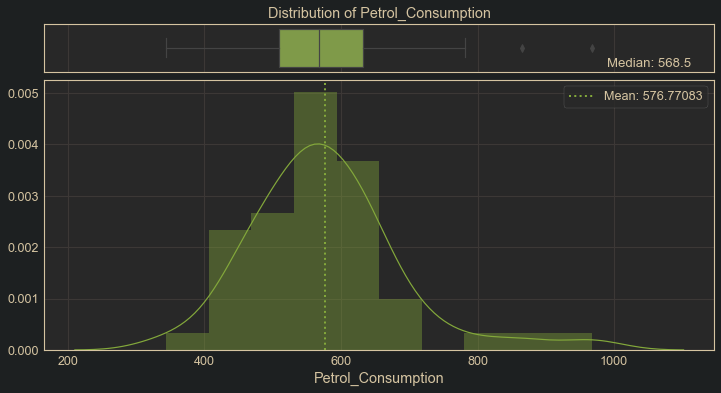

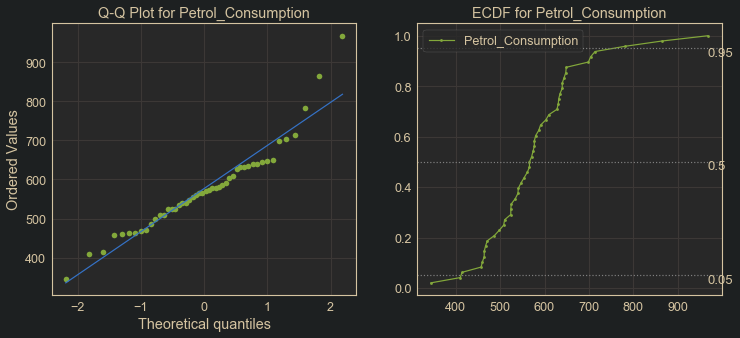

In [29]:
for col in dataset.columns:
    mf.visualize_distribution(dataset, [col])

Variable: Petrol_tax
Normality Test Results for ['Petrol_tax']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Petrol_tax 
 Statistic 
 9.462397e-01 
 0.898452 
 
 
 p-value 
 2.307783e-61 
 0.000561 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Petrol_tax 
 1.932537 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Petrol_tax 
 
 
 
 
 Statistic 
 3.818188 
 
 
 p-value 
 0.148215 
 
 
 Skew 
 -0.407780 
 
 
 Kurtosis 
 4.115328

count    48.000000
mean      2.029419
std       0.126237
min       1.609438
25%       1.945910
50%       2.014903
75%       2.094598
max       2.302585
Name: Petrol_tax, dtype: float64

Skew: -0.40778010067203935
Kurtosis: 1.1153275290329807


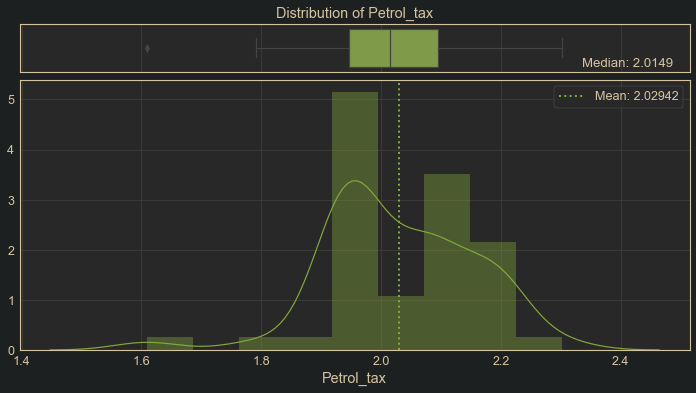

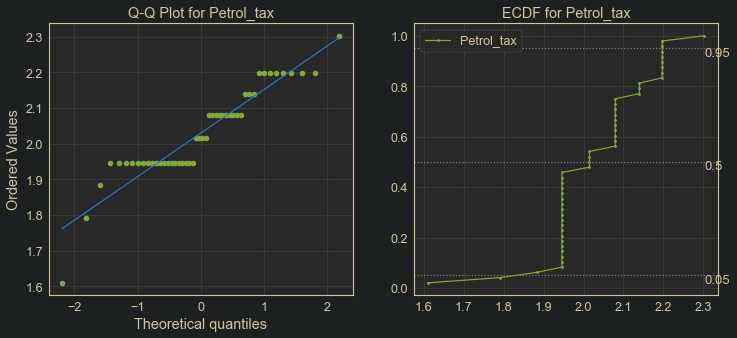

Variable: Average_income
Normality Test Results for ['Average_income']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Average_income 
 Statistic 
 1.0 
 0.976059 
 
 
 p-value 
 0.0 
 0.426958 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Average_income 
 0.375408 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Average_income 
 
 
 
 
 Statistic 
 1.205209 
 
 
 p-value 
 0.547384 
 
 
 Skew 
 -0.148776 
 
 
 Kurtosis 
 2.283015

count    48.000000
mean      8.343698
std       0.136512
min       8.027150
25%       8.226570
50%       8.365905
75%       8.429180
max       8.583355
Name: Average_income, dtype: float64

Skew: -0.14877570566892442
Kurtosis: -0.7169851217849268


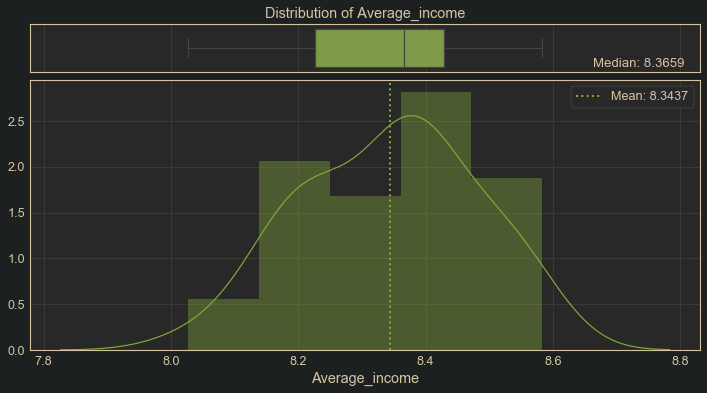

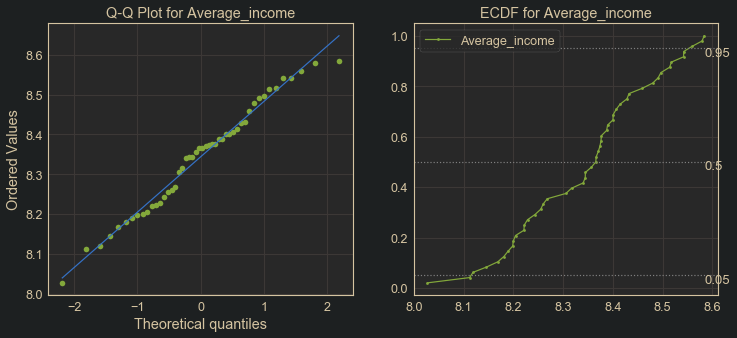

Variable: Paved_Highways
Normality Test Results for ['Paved_Highways']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Paved_Highways 
 Statistic 
 1.0 
 0.942209 
 
 
 p-value 
 0.0 
 0.019752 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Paved_Highways 
 0.807619 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Paved_Highways 
 
 
 
 
 Statistic 
 10.432892 
 
 
 p-value 
 0.005427 
 
 
 Skew 
 -0.969988 
 
 
 Kurtosis 
 4.205379

count    48.000000
mean      8.400068
std       0.750894
min       6.066108
25%       8.037963
50%       8.462840
75%       8.874268
max       9.785942
Name: Paved_Highways, dtype: float64

Skew: -0.9699882396061785
Kurtosis: 1.2053785489842586


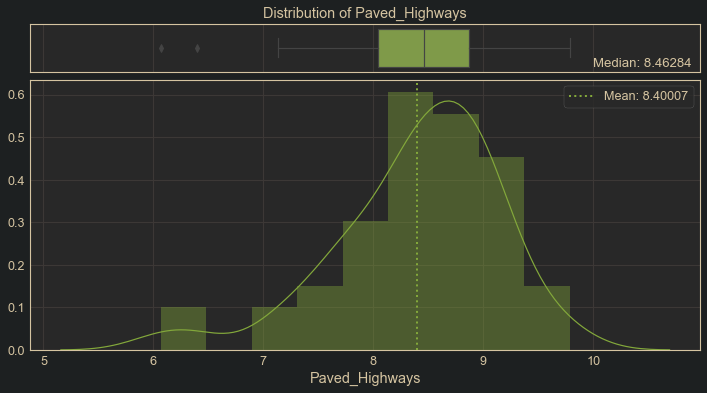

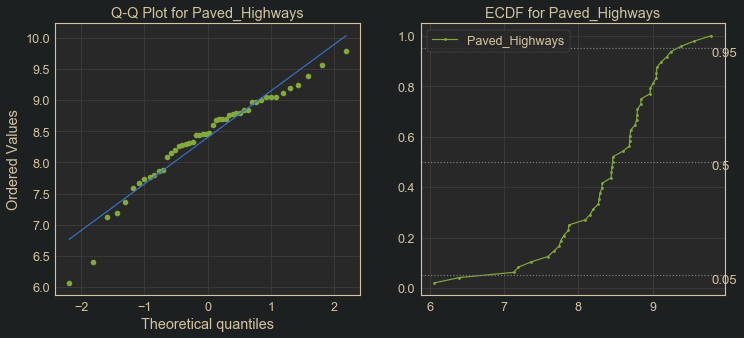

Variable: Population_Driver_licence(%)
Normality Test Results for ['Population_Driver_licence(%)']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Population_Driver_licence(%) 
 Statistic 
 6.309295e-01 
 0.976811 
 
 
 p-value 
 4.891369e-19 
 0.453751 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Population_Driver_licence(%) 
 0.486278 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Population_Driver_licence(%) 
 
 
 
 
 Statistic 
 1.032935 
 
 
 p-value 
 0.596624 
 
 
 Skew 
 0.351982 
 
 
 Kurtosis 
 3.144575

count    48.000000
mean     -0.566044
std       0.095445
min      -0.796288
25%      -0.635350
50%      -0.571818
75%      -0.518795
max      -0.322964
Name: Population_Driver_licence(%), dtype: float64

Skew: 0.35198217892113237
Kurtosis: 0.14457467073482144


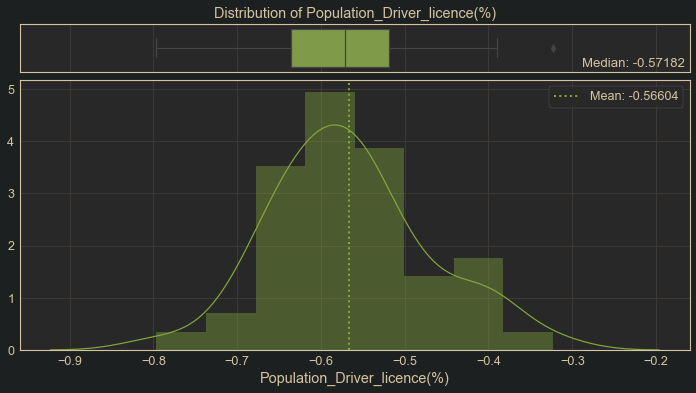

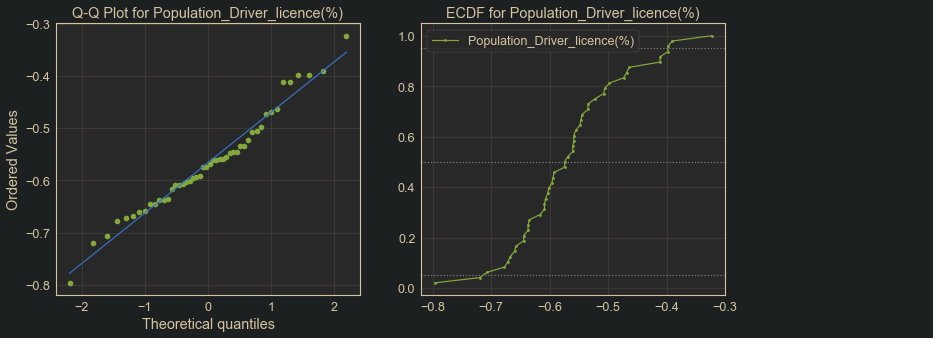

Variable: Petrol_Consumption
Normality Test Results for ['Petrol_Consumption']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Petrol_Consumption 
 Statistic 
 1.0 
 0.976558 
 
 
 p-value 
 0.0 
 0.444607 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Petrol_Consumption 
 0.409905 
 0.734 
 
 
 Jarque-Bera: 
 
 
 
 Petrol_Consumption 
 
 
 
 
 Statistic 
 2.559727 
 
 
 p-value 
 0.278075 
 
 
 Skew 
 0.203162 
 
 
 Kurtosis 
 4.055824

count    48.000000
mean      6.340083
std       0.186872
min       5.840642
25%       6.233428
50%       6.342992
75%       6.450073
max       6.875232
Name: Petrol_Consumption, dtype: float64

Skew: 0.20316242643774426
Kurtosis: 1.0558236553674867


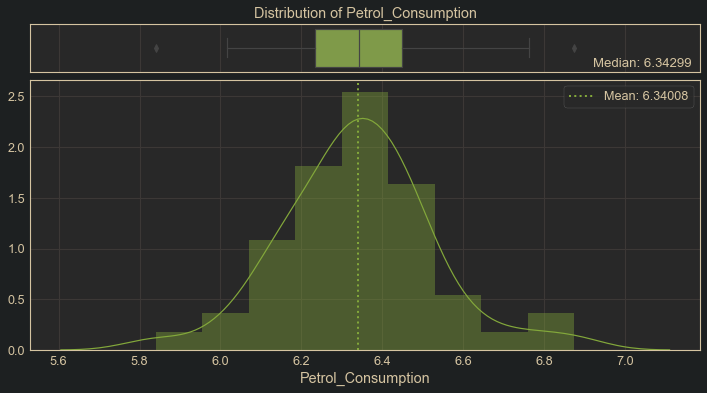

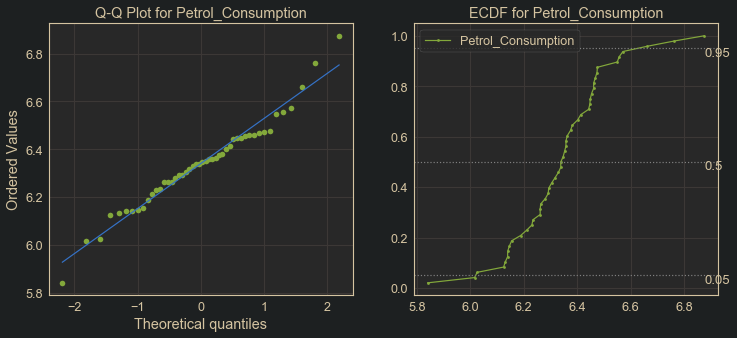

In [28]:
log_dataset = np.log(dataset)
for col in log_dataset.columns:
    mf.visualize_distribution(log_dataset, [col])

In [45]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=.20)
dt.fit(np.log(X_train), np.log(y_train))
y_pred = dt.predict(np.log(X_test))
r2_score(np.log(y_test), y_pred)

-0.04625153294132067

## Summary 

In this lesson, you implemented the architecture to train a tree regressor and predict values for unseen data. You saw that with a vanilla approach, the results were not so great, and thus we must further tune the model (what we described as hyperparameter optimization and pruning, in the case of trees). 